In [7]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# установка вывода графиков в окне jupiter
%matplotlib inline

In [8]:
# определение функции
def FButa(x, y):
    return np.power((x - y), 2.) + np.power(((x + y - 10)/3), 2.);

In [9]:
import random

# случайная точка
def get_random(xrange, yrange, state = None):
    if (state is None):
        x,y = -10, -10;

        return x, y;
    
    x = state[0] + random.random() - .5;
    y = state[1] + random.random() - .5;
    return x, y;

# реализация алглоритма имитации отжига (схема Коши)
def simulated_annealing(f, xrange, yrange, fstate, initialTemperature, endTemperature):
    # список проверяемых точек
    lstate = [];
    
    # задаём начальное состояние, как случайную точку
    state = get_random(xrange, yrange, fstate);
    lstate.append(state);
    
    # вычисляем энергию для первого состояния
    currentEnergy = f(state[0], state[1]);
    
    # начальная температура
    T = initialTemperature
    
    for iterator in range(1, 100000):
        # получаем состояние-кандидат
        stateCandidate = get_random(xrange, yrange, state);
        
        # вычисляем его энергию
        candidateEnergy = f(stateCandidate[0], stateCandidate[1]);
        
        # разница между состояниями
        deltaEnergy = candidateEnergy - currentEnergy
        
        # если кандидат обладает меньшей энергией
        if (deltaEnergy < 0):
            # то он переходит в текущее состояние
            currentEnergy = candidateEnergy
            state = stateCandidate
        else:
            # иначе, считаем вероятность
            p = np.exp(-deltaEnergy/T)

            # и смотрим, осуществится ли переход
            if (np.random.rand() <= p):
                currentEnergy = candidateEnergy
                state = stateCandidate

        # уменьшаем температуру (схема Коши)
        T = initialTemperature / iterator; 

        # запись текущей точки
        lstate.append(state);
        
        # технологический вывод
        if iterator % 1000 == 0:
            print("Iteration #:%d, temperature:%f, cost:%.3f" % (iterator, T, currentEnergy))
        
        # условие выхода
        if T <= endTemperature:
            break
            
    return state, currentEnergy, lstate

In [10]:
# запуск алгоритма  
point, cost, lstate = simulated_annealing(FButa, (-10, 10), (-10, 10), None, 500, 0.1);

Iteration #:1000, temperature:0.500000, cost:0.235
Iteration #:2000, temperature:0.250000, cost:0.068
Iteration #:3000, temperature:0.166667, cost:0.261
Iteration #:4000, temperature:0.125000, cost:0.092
Iteration #:5000, temperature:0.100000, cost:0.078


In [11]:
print ('Минимум:{0} в точке ({1}, {2})'.format(cost, point[0], point[1]));

Минимум:0.07767873850280232 в точке (5.398226965142402, 5.431808631497145)


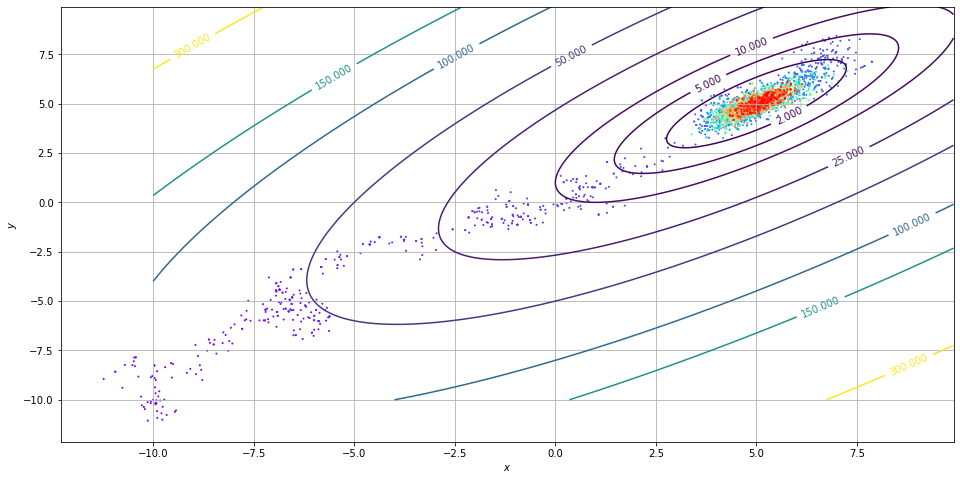

In [12]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# определение данных
X = np.arange(-10, 10, .1)
Y = np.arange(-10, 10, .1)
X, Y = np.meshgrid(X, Y)

Z = FButa(X,Y)

# вывод функции (1)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300]);

# вывод точек
p = np.array(lstate);
colors = cm.rainbow(np.linspace(0, 1, len(p)))
ax.scatter(p[:,0], p[:,1], s = 1, color = colors)

# добавление подписей к линиям уровня
ax.clabel(cs);

ax.grid();

plt.show()